# **Tugas 2 - Pre-Processing Data dan TF-IDF**

**Nama : Adz Dzikry Pradana Putra**

**NIM  : 210411100093**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW/data_berita_detik.csv")
df.head(6)

,judul,isi,tanggal,kategori
0,3 Cara Log Out Akun ML 2024 dan Beralih Akun Baru,Jakarta - Mobile Legends (ML) adalah salah sat...,"Sabtu, 07 Sep 2024 19:41 WIB",Games
1,Ada Apa dengan Indostars di FFWS SEA 2024 Fall...,Jakarta - Free Fire World Series (FFWS) Southe...,"Sabtu, 07 Sep 2024 17:18 WIB",Games
2,"NBA 2K25 Rilis di PS4, PS5, Xbox, dan PC, Segi...",Jakarta - 2K selaku penerbit dan Visual Concep...,"Sabtu, 07 Sep 2024 16:14 WIB",Games
3,Film Adaptasi Game Minecraft Rilis Teaser Trai...,Jakarta - Warner Bros Pictures telah merilis t...,"Sabtu, 07 Sep 2024 11:30 WIB",Games
4,Universitas Terbuka Gelar Turnamen Mobile Lege...,Jakarta - Universitas Terbuka (UT) menggelar M...,"Jumat, 06 Sep 2024 22:14 WIB",Games
5,Tips Jago Football Manager 2024 Ala Juara Duni...,"Jakarta - Tahukah detikers, Indonesia sukses m...","Jumat, 06 Sep 2024 21:40 WIB",Games


**CLEANING**


---



**Cleaning Data** adalah proses awal dalam pengolahan teks yang bertujuan untuk membersihkan data
teks dari elemen-elemen yang tidak diperlukan atau mengganggu, seperti :
- Tanda baca
(punctuation) titik, koma, tanda seru
- Tag
- URL
- Simbol-simbol
- Emoticon
- Angka random

In [16]:
import re
import string
import nltk

def remove_url(text):
  url = re.compile(r'https?://\S+|www\.S+')
  return url.sub(r'', text)

def remove_html(text):
  html = re.compile(r'<.#?>')
  return html.sub(r'', text)

def remove_emoji(text):
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF""]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def remove_symbols(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text) #menghapus semua simbol
  return text

df['Hasil cleansing'] = df['isi'].apply(lambda x: remove_url(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_html(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_emoji(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_symbols(x))
df['Hasil cleansing'] = df['Hasil cleansing'].apply(lambda x: remove_numbers(x))

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing
0,3 Cara Log Out Akun ML 2024 dan Beralih Akun Baru,Jakarta - Mobile Legends (ML) adalah salah sat...,"Sabtu, 07 Sep 2024 19:41 WIB",Games,Jakarta Mobile Legends ML adalah salah satu g...
1,Ada Apa dengan Indostars di FFWS SEA 2024 Fall...,Jakarta - Free Fire World Series (FFWS) Southe...,"Sabtu, 07 Sep 2024 17:18 WIB",Games,Jakarta Free Fire World Series FFWS Southeeas...
2,"NBA 2K25 Rilis di PS4, PS5, Xbox, dan PC, Segi...",Jakarta - 2K selaku penerbit dan Visual Concep...,"Sabtu, 07 Sep 2024 16:14 WIB",Games,Jakarta K selaku penerbit dan Visual Concept ...
3,Film Adaptasi Game Minecraft Rilis Teaser Trai...,Jakarta - Warner Bros Pictures telah merilis t...,"Sabtu, 07 Sep 2024 11:30 WIB",Games,Jakarta Warner Bros Pictures telah merilis te...
4,Universitas Terbuka Gelar Turnamen Mobile Lege...,Jakarta - Universitas Terbuka (UT) menggelar M...,"Jumat, 06 Sep 2024 22:14 WIB",Games,Jakarta Universitas Terbuka UT menggelar Mobi...
5,Tips Jago Football Manager 2024 Ala Juara Duni...,"Jakarta - Tahukah detikers, Indonesia sukses m...","Jumat, 06 Sep 2024 21:40 WIB",Games,Jakarta Tahukah detikers Indonesia sukses men...


**CASE FOLDING**


---



**Casefolding** adalah langkah dalam preprocessing yang melibatkan
pengonversian semua karakter teks menjadi huruf kecil. Tujuan dari casefolding adalah
untuk menghilangkan ambiguitas yang dapat muncul karena perbedaan huruf besar
dan kecil. Misalnya, kata yang sama tetapi ditulis dengan huruf besar atau kecil akan
dianggap sebagai entitas yang berbeda. Dengan menerapkan casefolding, konsistensi
dalam representasi kata dapat dipertahankan.

In [17]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else :
      return text

df ['Hasil case_folding'] = df['Hasil cleansing'].apply(case_folding)

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding
0,3 Cara Log Out Akun ML 2024 dan Beralih Akun Baru,Jakarta - Mobile Legends (ML) adalah salah sat...,"Sabtu, 07 Sep 2024 19:41 WIB",Games,Jakarta Mobile Legends ML adalah salah satu g...,jakarta mobile legends ml adalah salah satu g...
1,Ada Apa dengan Indostars di FFWS SEA 2024 Fall...,Jakarta - Free Fire World Series (FFWS) Southe...,"Sabtu, 07 Sep 2024 17:18 WIB",Games,Jakarta Free Fire World Series FFWS Southeeas...,jakarta free fire world series ffws southeeas...
2,"NBA 2K25 Rilis di PS4, PS5, Xbox, dan PC, Segi...",Jakarta - 2K selaku penerbit dan Visual Concep...,"Sabtu, 07 Sep 2024 16:14 WIB",Games,Jakarta K selaku penerbit dan Visual Concept ...,jakarta k selaku penerbit dan visual concept ...
3,Film Adaptasi Game Minecraft Rilis Teaser Trai...,Jakarta - Warner Bros Pictures telah merilis t...,"Sabtu, 07 Sep 2024 11:30 WIB",Games,Jakarta Warner Bros Pictures telah merilis te...,jakarta warner bros pictures telah merilis te...
4,Universitas Terbuka Gelar Turnamen Mobile Lege...,Jakarta - Universitas Terbuka (UT) menggelar M...,"Jumat, 06 Sep 2024 22:14 WIB",Games,Jakarta Universitas Terbuka UT menggelar Mobi...,jakarta universitas terbuka ut menggelar mobi...
5,Tips Jago Football Manager 2024 Ala Juara Duni...,"Jakarta - Tahukah detikers, Indonesia sukses m...","Jumat, 06 Sep 2024 21:40 WIB",Games,Jakarta Tahukah detikers Indonesia sukses men...,jakarta tahukah detikers indonesia sukses men...


**TOKENIZATION**


---



**Tokenization atau Tokenisasi** memisahkan kata per kata dengan operator tokenize pada text
processing. Tujuannya untuk dikelompokkan kemunculan suatu kata pada proses
selanjutnya.Lebih jelasnya untuk memecah teks menjadi unit terkecil yang dapat
berupa kata,frasa atau karakter terpisah.

In [18]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['Hasil case_folding'].apply(tokenize)

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding,tokenize
0,3 Cara Log Out Akun ML 2024 dan Beralih Akun Baru,Jakarta - Mobile Legends (ML) adalah salah sat...,"Sabtu, 07 Sep 2024 19:41 WIB",Games,Jakarta Mobile Legends ML adalah salah satu g...,jakarta mobile legends ml adalah salah satu g...,"[jakarta, mobile, legends, ml, adalah, salah, ..."
1,Ada Apa dengan Indostars di FFWS SEA 2024 Fall...,Jakarta - Free Fire World Series (FFWS) Southe...,"Sabtu, 07 Sep 2024 17:18 WIB",Games,Jakarta Free Fire World Series FFWS Southeeas...,jakarta free fire world series ffws southeeas...,"[jakarta, free, fire, world, series, ffws, sou..."
2,"NBA 2K25 Rilis di PS4, PS5, Xbox, dan PC, Segi...",Jakarta - 2K selaku penerbit dan Visual Concep...,"Sabtu, 07 Sep 2024 16:14 WIB",Games,Jakarta K selaku penerbit dan Visual Concept ...,jakarta k selaku penerbit dan visual concept ...,"[jakarta, k, selaku, penerbit, dan, visual, co..."
3,Film Adaptasi Game Minecraft Rilis Teaser Trai...,Jakarta - Warner Bros Pictures telah merilis t...,"Sabtu, 07 Sep 2024 11:30 WIB",Games,Jakarta Warner Bros Pictures telah merilis te...,jakarta warner bros pictures telah merilis te...,"[jakarta, warner, bros, pictures, telah, meril..."
4,Universitas Terbuka Gelar Turnamen Mobile Lege...,Jakarta - Universitas Terbuka (UT) menggelar M...,"Jumat, 06 Sep 2024 22:14 WIB",Games,Jakarta Universitas Terbuka UT menggelar Mobi...,jakarta universitas terbuka ut menggelar mobi...,"[jakarta, universitas, terbuka, ut, menggelar,..."
5,Tips Jago Football Manager 2024 Ala Juara Duni...,"Jakarta - Tahukah detikers, Indonesia sukses m...","Jumat, 06 Sep 2024 21:40 WIB",Games,Jakarta Tahukah detikers Indonesia sukses men...,jakarta tahukah detikers indonesia sukses men...,"[jakarta, tahukah, detikers, indonesia, sukses..."


**FILTERING/STOPWORD REMOVAL**


---



Tahap **Stopword Removal** yakni sebagai tahap pemilihan kata-kata yang
dianggap tidak penting atau kata yang tidak relevan.Untuk mengetahui kata mana yang
tidak relevan berdasarkan dari daftar stopword removal yang digunakan.

In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pada tahap ini menggunakan library **NLTK stopword removal bahasa indonesia**.Contoh stopwords dalam bahasa Indonesia adalah “yang” , “bahwa”, “itu”, ”ini”, “dengan” dan sebagainya.

In [20]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['Hasil stopword'] = df['tokenize'].apply(lambda x: ' '.join(remove_stopwords(x)))

df.head(6)

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding,tokenize,Hasil stopword
0,3 Cara Log Out Akun ML 2024 dan Beralih Akun Baru,Jakarta - Mobile Legends (ML) adalah salah sat...,"Sabtu, 07 Sep 2024 19:41 WIB",Games,Jakarta Mobile Legends ML adalah salah satu g...,jakarta mobile legends ml adalah salah satu g...,"[jakarta, mobile, legends, ml, adalah, salah, ...",jakarta mobile legends ml salah game online po...
1,Ada Apa dengan Indostars di FFWS SEA 2024 Fall...,Jakarta - Free Fire World Series (FFWS) Southe...,"Sabtu, 07 Sep 2024 17:18 WIB",Games,Jakarta Free Fire World Series FFWS Southeeas...,jakarta free fire world series ffws southeeas...,"[jakarta, free, fire, world, series, ffws, sou...",jakarta free fire world series ffws southeeast...
2,"NBA 2K25 Rilis di PS4, PS5, Xbox, dan PC, Segi...",Jakarta - 2K selaku penerbit dan Visual Concep...,"Sabtu, 07 Sep 2024 16:14 WIB",Games,Jakarta K selaku penerbit dan Visual Concept ...,jakarta k selaku penerbit dan visual concept ...,"[jakarta, k, selaku, penerbit, dan, visual, co...",jakarta k penerbit visual concept pengembang g...
3,Film Adaptasi Game Minecraft Rilis Teaser Trai...,Jakarta - Warner Bros Pictures telah merilis t...,"Sabtu, 07 Sep 2024 11:30 WIB",Games,Jakarta Warner Bros Pictures telah merilis te...,jakarta warner bros pictures telah merilis te...,"[jakarta, warner, bros, pictures, telah, meril...",jakarta warner bros pictures merilis teaser tr...
4,Universitas Terbuka Gelar Turnamen Mobile Lege...,Jakarta - Universitas Terbuka (UT) menggelar M...,"Jumat, 06 Sep 2024 22:14 WIB",Games,Jakarta Universitas Terbuka UT menggelar Mobi...,jakarta universitas terbuka ut menggelar mobi...,"[jakarta, universitas, terbuka, ut, menggelar,...",jakarta universitas terbuka ut menggelar mobil...
5,Tips Jago Football Manager 2024 Ala Juara Duni...,"Jakarta - Tahukah detikers, Indonesia sukses m...","Jumat, 06 Sep 2024 21:40 WIB",Games,Jakarta Tahukah detikers Indonesia sukses men...,jakarta tahukah detikers indonesia sukses men...,"[jakarta, tahukah, detikers, indonesia, sukses...",jakarta tahukah detikers indonesia sukses menj...


In [21]:
df.to_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW/hasil_preprocesing.csv",encoding='utf8', index=False)

---

**TERM FREQUENCY AND INVERSE DOCUMENT FREQUNENCY (TF-IDF)**

---

**Count Vectorizer** mengonversi setiap dokumen teks menjadi vektor yang berisi
frekuensi kemunculan setiap kata dalam dokumen tersebut.Pembobotan TF-IDF
menghitung nilai bobot setiap kata untuk setiap dokumen. Ini dibagi menjadi dua proses
yaitu **TF** dan **IDF**.

**TF (Term Frequency)** menghitung jumlah kemunculan setiap kata dalam dokumen,
dan dengan kemunculan kata terbanyak, nilai kata tersebut adalah yang terbesar.

**IDF (Inverse Document Frequency)** menghitung jumlah dokumen untuk setiap kata yang
jarang muncul dalam dokumen yang dianggap memiliki nilai terbesar. Jika kata tersebut
memiliki banyak kemunculan kata dalam dokumen, hasilnya akan memiliki nilai yang
kecil.

In [22]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW/hasil_preprocesing.csv", sep=",")

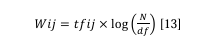

Keterangan :
- 𝑓𝑖,𝑗 : jumlah kata i muncul dalam dokumen j
- 𝑓𝑖 : jumlah dokumen yang mengandung I
- N : total seluruh dokumen.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer tanpa max_features dan stop_words
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF untuk kolom 'isi' dari dataframe
tfidf_matrix = vectorizer.fit_transform(df['Hasil stopword'])

# Mengubah kedalam DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head(10)

,acara,action,adrian,aff,affraw,afpadan,afrika,agregat,agresif,agustus,...,xs,ya,yangmana,yg,youth,youtube,youtubenya,yuk,zirkzee,zombies
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0602,0.043741,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.000000,...,0.139415,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.128777,0.059078,0.000000,0.0,0.059078
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.030527,...,0.000000,0.0,0.0,0.000000,0.084028,0.000000,0.000000,0.000000,0.0,0.000000
5,0.0,0.000000,0.0,0.059138,0.0,0.0,0.059138,0.059138,0.0000,0.000000,...,0.000000,0.0,0.0,0.059138,0.000000,0.000000,0.000000,0.051984,0.0,0.000000
6,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.024892,0.0,0.000000
7,0.0,0.043853,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.031863,0.000000,0.000000,0.0,0.000000
8,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.026816,0.000000,0.000000,0.0,0.000000
9,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.021389,...,0.000000,0.0,0.0,0.000000,0.000000,0.021389,0.000000,0.000000,0.0,0.000000
